# Implementation of clustering algorithms

Build K-Means and Agglomerative Clustering models to perform an unsupervised clustering by using given data. Follow below steps as a guideline for building your model and explain each of them in code lines. 

* Data cleaning (25 points)

Start with data cleaning to ensure that your data is correct, consistent and usable. The techniques used for data cleaning may vary but you can consider to follow these basic steps: handling missing values, encoding categorical features, extracting useful features by using existing features, handling outliers etc.

* Data Preprocessing (25 points)

In this step you should transform raw data into an understandable format for machine learning algorithms. This step may include scaling the features, performing dimensionality reduction etc.

* Clustering (30)

The goal of this step is to find distinct groups or “clusters” within a data set by using K-Means and Agglomerative Clustering Algorithms. Apply Elbow Method to determine the number of clusters. After building models, examine and comment the clusters formed via scatter plot.

* Silhouette Scores (20)

To evaluate how “well clustered” data points are, use the “silhouette score” and plot the Silhouette Scores for all of data points.

Note: Don't forget to explain your codes and comment on the obtained result.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="white")


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data (1).csv')
df

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,...,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,...,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,996,8492,1978,Graduation,Together,75437.0,0,0,09-11-2013,25,...,6,0,0,0,1,0,0,3,11,0
997,997,11188,1957,Graduation,Together,26091.0,1,1,25-02-2014,84,...,5,0,0,0,0,0,0,3,11,0
998,998,1212,1973,Graduation,Married,52845.0,1,0,13-08-2013,7,...,6,1,0,0,0,0,0,3,11,0
999,999,9097,1956,Graduation,Divorced,46086.0,0,1,03-11-2013,34,...,4,0,0,0,0,0,0,3,11,0


In [3]:
df.shape

(1001, 30)

In [4]:
print("Number of unique id's in CUST_ID column : ",df.ID.nunique())
print("Number of rows in dataframe : ",df.shape[0])
print('This is to check if we have a single row for each unique ID. We can drop customer id since we do not get any information from it.')

Number of unique id's in CUST_ID column :  1001
Number of rows in dataframe :  1001
This is to check if we have a single row for each unique ID. We can drop customer id since we do not get any information from it.


In [5]:
df.drop(columns='ID',inplace=True)
df.drop(columns='Unnamed: 0',inplace=True)
df.drop(columns='Dt_Customer',inplace=True)
df['Education'] = df['Education'].map({'Graduation': 1, 'PhD': 0})
df['Marital_Status'] = df['Marital_Status'].map({'Alone': 0,'Divorced': 1,'Married': 2,'Single': 3,'Together': 4,'Widow': 5})
df['Spent'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
df = df.drop(['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases'], axis=1)


In [6]:
df = df[~(df['Year_Birth'] <= 1940)]  
df = df[~(df['Income'] > 110000)]  

In [7]:
df.shape

(994, 24)

In [8]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response', 'Spent'],
      dtype='object')

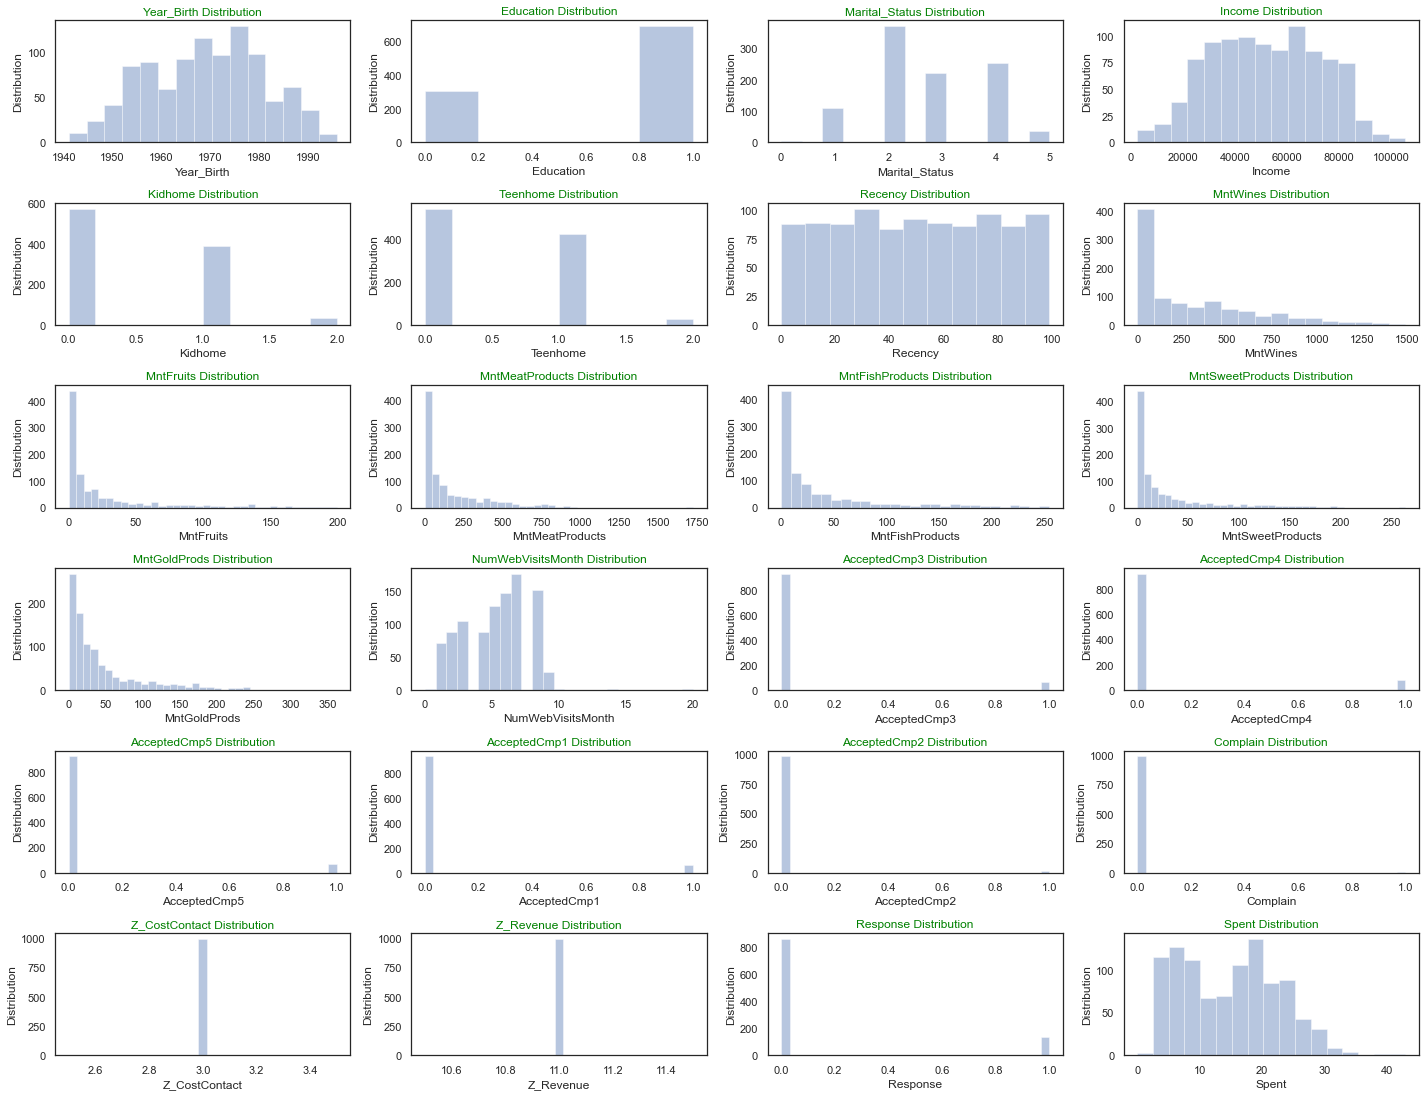

In [9]:
f=plt.figure(figsize=(20,20))
for i, col in enumerate(df.columns):
    ax=f.add_subplot(8,4,i+1)
    sns.distplot(df[col].ffill(),kde=False)
    ax.set_title(col+" Distribution",color='Green')
    plt.ylabel('Distribution')
f.tight_layout()

<AxesSubplot:>

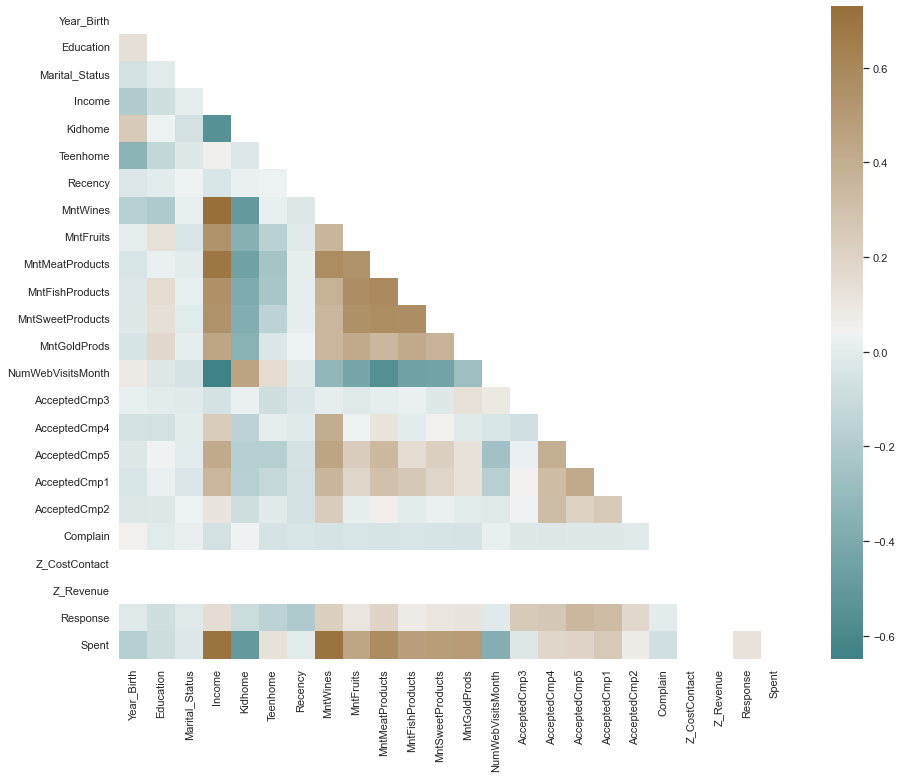

In [10]:
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(200, 50, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,)

In [11]:
print(df.isna().sum())

Year_Birth             0
Education            269
Marital_Status         0
Income                13
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Spent                  0
dtype: int64


In [12]:
df['Education'].fillna(df['Education'].median(),inplace=True)
df['Income'].fillna(df['Income'].median(),inplace=True)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Scaled_df = scaler.fit_transform(df)


In [14]:
df_scaled = pd.DataFrame(Scaled_df,columns=df.columns)
df_scaled.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Spent
0,-1.016495,0.536251,0.252254,0.293965,-0.815338,-0.874665,0.311058,0.965528,1.583245,1.722053,...,-0.26233,-0.28773,-0.268842,-0.26233,-0.119523,-0.084215,0.0,0.0,2.522491,1.332926
1,-1.270853,0.536251,0.252254,-0.275722,0.973726,0.932855,-0.383833,-0.880304,-0.625004,-0.743535,...,-0.26233,-0.28773,-0.268842,-0.26233,-0.119523,-0.084215,0.0,0.0,-0.396433,-1.177159
2,-0.338206,0.536251,1.177496,0.944849,-0.815338,-0.874665,-0.800767,0.347293,0.593340,-0.191061,...,-0.26233,-0.28773,-0.268842,-0.26233,-0.119523,-0.084215,0.0,0.0,-0.396433,0.804487
3,1.272730,0.536251,1.177496,-1.227197,0.973726,-0.874665,-0.800767,-0.880304,-0.548858,-0.679612,...,-0.26233,-0.28773,-0.268842,-0.26233,-0.119523,-0.084215,0.0,0.0,-0.396433,-0.912939
4,1.018372,-1.864800,-0.672988,0.301452,0.973726,-0.874665,1.561861,-0.401097,0.441047,-0.232154,...,-0.26233,-0.28773,-0.268842,-0.26233,-0.119523,-0.084215,0.0,0.0,-0.396433,0.540268


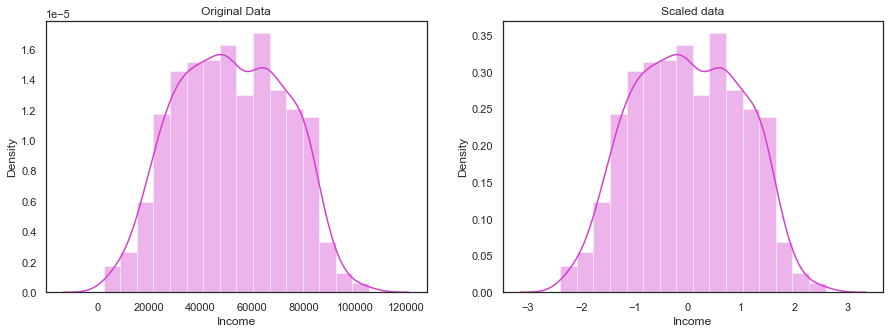

In [15]:
fig, ax=plt.subplots(1,2,figsize=(15,5))
sns.distplot(df['Income'], ax=ax[0],color='#D341CD')
ax[0].set_title("Original Data")
sns.distplot(df_scaled['Income'], ax=ax[1],color='#D341CD')
ax[1].set_title("Scaled data")
plt.show()

In [16]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(Scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [17]:
kmeans.labels_

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,

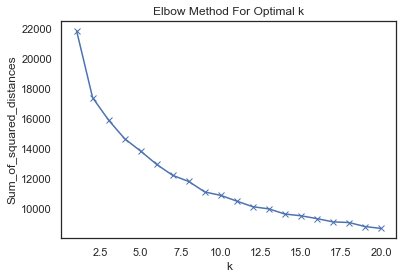

In [18]:
Sum_of_squared_distances = []
K = range(1,21)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(Scaled_df)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [19]:
from sklearn.metrics import silhouette_score, silhouette_samples

for n_clusters in range(2,21):
    km = KMeans (n_clusters=n_clusters)
    preds = km.fit_predict(Scaled_df)
    centers = km.cluster_centers_

    score = silhouette_score(Scaled_df, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.2368463352355745
For n_clusters = 3, silhouette score is 0.21174850204696039
For n_clusters = 4, silhouette score is 0.15920046806723975
For n_clusters = 5, silhouette score is 0.16150066574799504
For n_clusters = 6, silhouette score is 0.1674016909770777
For n_clusters = 7, silhouette score is 0.10257294007389094
For n_clusters = 8, silhouette score is 0.11953144572633428
For n_clusters = 9, silhouette score is 0.1298364551000265
For n_clusters = 10, silhouette score is 0.12764961852259615
For n_clusters = 11, silhouette score is 0.12926194893016954
For n_clusters = 12, silhouette score is 0.13875219860317273
For n_clusters = 13, silhouette score is 0.13890003220717265
For n_clusters = 14, silhouette score is 0.11709933226126519
For n_clusters = 15, silhouette score is 0.14372252932885224
For n_clusters = 16, silhouette score is 0.13336087427009666
For n_clusters = 17, silhouette score is 0.13360669158007651
For n_clusters = 18, silhouette sco

In [20]:
#conda install -c conda-forge yellowbrick

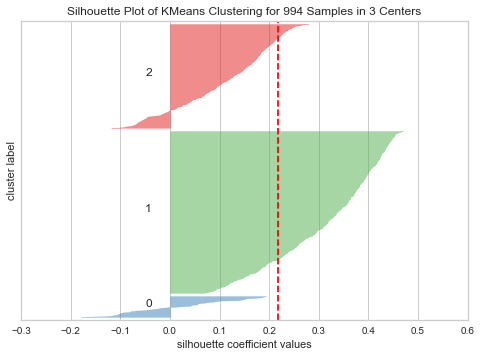

In [21]:
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
km = KMeans (n_clusters=3)
visualizer = SilhouetteVisualizer(km)

visualizer.fit(Scaled_df) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data

In [22]:
#Results
km = KMeans(n_clusters=3)
km.fit(Scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [23]:
cluster_label = km.labels_
df['KMEANS_LABELS'] = cluster_label
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Spent,KMEANS_LABELS
0,1957,1.0,3,58138.0,0,0,58,635,88,546,...,0,0,0,0,0,3,11,1,25,1
1,1954,1.0,3,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,3,11,0,6,0
2,1965,1.0,4,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,3,11,0,21,1
3,1984,1.0,4,26646.0,1,0,26,11,4,20,...,0,0,0,0,0,3,11,0,8,0
4,1981,0.0,2,58293.0,1,0,94,173,43,118,...,0,0,0,0,0,3,11,0,19,0


In [24]:
df.columns


Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response', 'Spent', 'KMEANS_LABELS'],
      dtype='object')

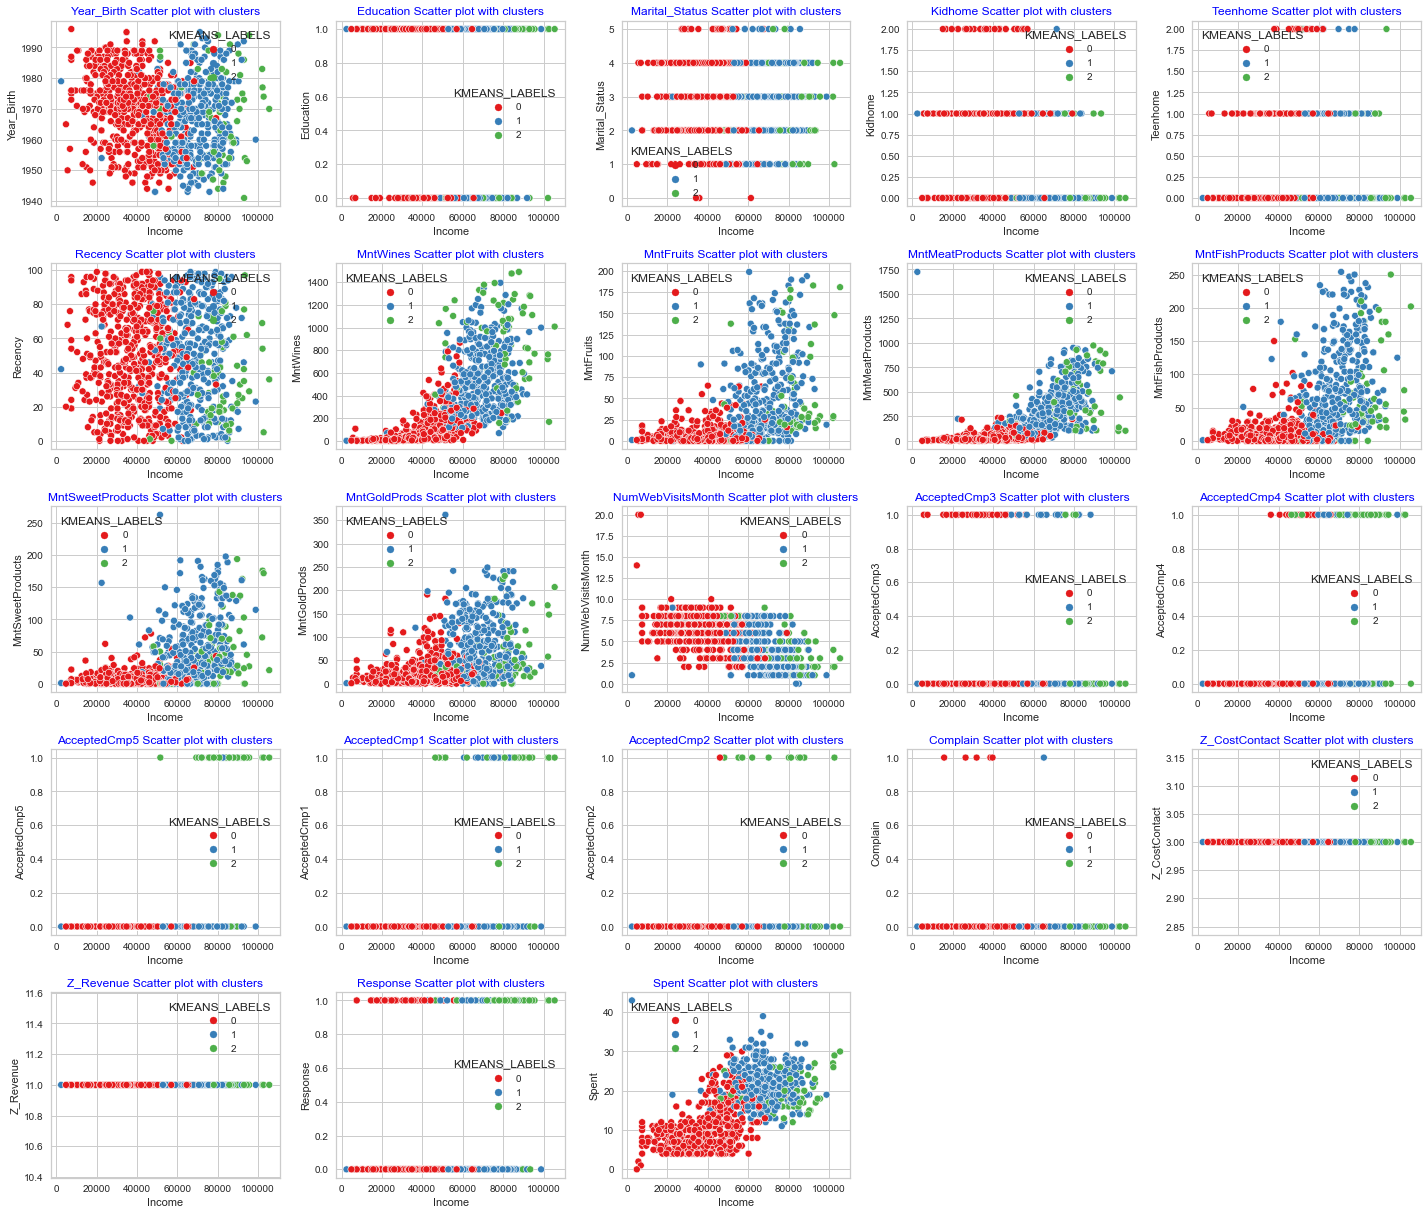

In [25]:
f=plt.figure(figsize=(20,20))
scatter_cols =['Year_Birth', 'Education', 'Marital_Status', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response', 'Spent']
for i, col in enumerate(scatter_cols):
    ax=f.add_subplot(6,5,i+1)
    sns.scatterplot(x=df['Income'],y=df[col],hue=df['KMEANS_LABELS'],palette='Set1')
    ax.set_title(col+" Scatter plot with clusters",color='blue')
    plt.ylabel(col)
f.tight_layout()

In [26]:
sample_df = pd.DataFrame([df['Income'],df['Spent']])
sample_df = sample_df.T
sample_df.head()

,Income,Spent
0,58138.0,25.0
1,46344.0,6.0
2,71613.0,21.0
3,26646.0,8.0
4,58293.0,19.0


In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Sample_Scaled_df = scaler.fit_transform(sample_df)


In [28]:
km_sample = KMeans(n_clusters=3)
km_sample.fit(Sample_Scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [29]:
labels_sample = km_sample.labels_
sample_df['label'] = labels_sample


<AxesSubplot:xlabel='Income', ylabel='Spent'>

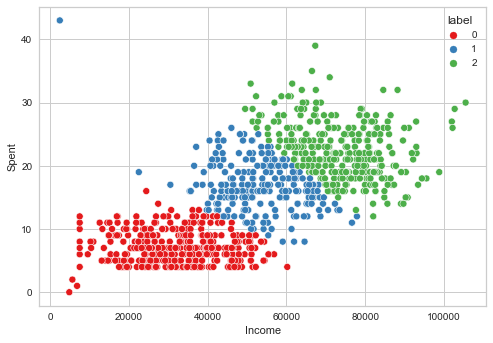

In [30]:
sns.set_palette('Set2')
sns.scatterplot(sample_df['Income'],sample_df['Spent'],hue=sample_df['label'],palette='Set1')

In [31]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(df)

array([0, 0, 2, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 2, 0, 0, 2, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 1, 0,
       1, 2, 1, 0, 0, 2, 0, 2, 1, 2, 0, 2, 2, 1, 0, 0, 2, 0, 0, 0, 2, 1,
       1, 2, 2, 2, 0, 0, 0, 0, 1, 0, 2, 2, 1, 0, 1, 1, 1, 0, 2, 1, 1, 0,
       2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 1, 2, 0, 2, 1, 0, 0, 0, 2,
       2, 0, 0, 2, 0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 2, 2, 2, 0, 0, 2, 0, 0,
       2, 0, 0, 0, 1, 1, 1, 0, 2, 0, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 1, 2, 1, 2, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 2, 2,
       0, 0, 2, 0, 1, 0, 1, 1, 1, 1, 0, 2, 0, 1, 0, 0, 0, 1, 2, 2, 2, 0,
       2, 2, 0, 2, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2,
       2, 1, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 0, 1, 1, 2, 1, 2, 0, 1, 2, 0,
       1, 2, 2, 0, 0, 1, 1, 2, 1, 2, 1, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 2,
       0, 2, 1, 2, 1, 0, 1, 1, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 1, 2, 0, 2,
       1, 1, 0, 2, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,

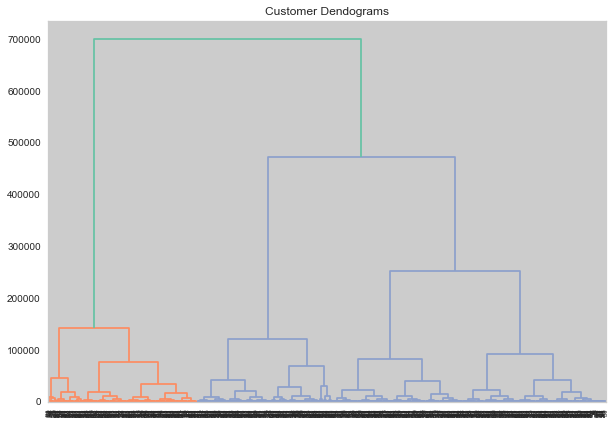

In [32]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(df, method='ward'))

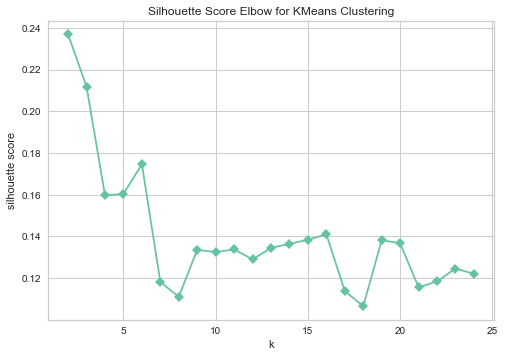

In [33]:
from yellowbrick.cluster import KElbowVisualizer
# Instantiate the clustering model and visualizer
km = KMeans (n_clusters=3)
visualizer = KElbowVisualizer(
    km, k=(2,25),metric ='silhouette', timings=False
)

visualizer.fit(Scaled_df) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data